In [81]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import sech
from math import prod

# 6.3

### 6.3 (c)

In [35]:
x = np.linspace(-5, 5, 50) 

In [36]:
def f(x):
    return np.log(np.cosh(x))

In [37]:
def f_prime(x):
    return np.tanh(x)

In [44]:
def f_double_prime(x):
    return sech(x)**2

In [38]:
def Q(x, y):
    return f(y) + f_prime(y)*(x - y) + 0.5*(x - y)**2

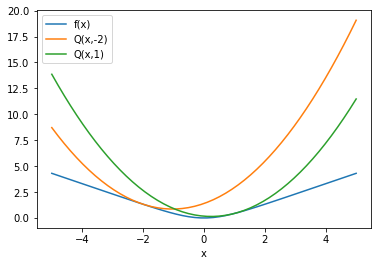

In [39]:
plt.plot(x, f(x), label='f(x)')
plt.plot(x, Q(x, -2), label='Q(x,-2)')
plt.plot(x, Q(x, 1), label='Q(x,1)')
plt.xlabel('x')
plt.legend()
plt.show()

### 6.3 (f)

In [40]:
def update_e(x0, iters):
    x = np.zeros(iters)
    
    x[0] = x0
    
    for n in range(iters - 1):
        x[n+1] = x[n] - f_prime(x[n])
        
    return x

In [41]:
x0 = [-2, 1]
iters = 5
x = np.zeros((len(x0), iters))

for i in range(len(x0)):
    x[i, :] = update_e(x0[i], iters)
    

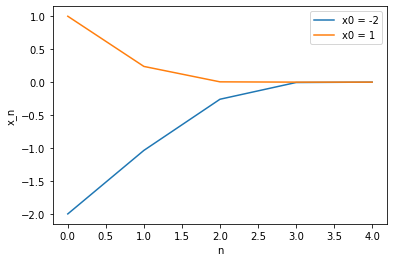

In [42]:
plt.plot(np.arange(0, iters, 1), x[0, :], label='x0 = -2')
plt.plot(np.arange(0, iters, 1), x[1, :], label='x0 = 1')
plt.ylabel('x_n')
plt.xlabel('n')
plt.legend()
plt.show()

In [45]:
def update_g(x0, iters):
    x = np.zeros(iters)
    
    x[0] = x0
    
    for n in range(iters - 1):
        x[n+1] = x[n] - f_prime(x[n])/f_double_prime(x[n])
        
    return x

In [49]:
x0 = [1]
iters = 10
x = np.zeros((len(x0), iters))

for i in range(len(x0)):
    x[i, :] = update_g(x0[i], iters)

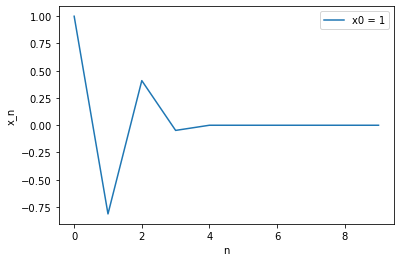

In [54]:
plt.plot(np.arange(0, iters, 1), x[0, :], label='x0 = 1')
plt.ylabel('x_n')
plt.xlabel('n')
plt.legend()
plt.show()

In [73]:
x0 = np.linspace(1.05,1.09,1000)
iters = 10
x = np.zeros((len(x0), iters))

for i in range(len(x0)):
    try:
        x[i, :] = update_g(x0[i], iters)
    except ZeroDivisionError:
        print(x0[i])
        break

1.0893993993993996


### 6.3 (h)

In [76]:
def g(x):
    sumk = 0
    for k in range(1,11):
        sumk += np.log(np.cosh(x + (1/k)))
        
    return sumk/10
        

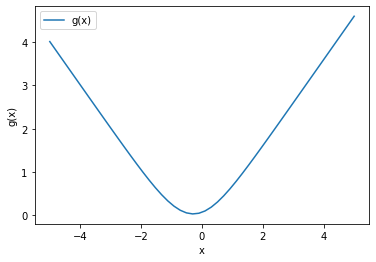

In [77]:
x = np.linspace(-5, 5, 50)
plt.plot(x, g(x), label='g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()

### 6.3 (k)

In [78]:
def g_prime(x):
    sumk = 0
    for k in range(1,11):
        sumk += np.tanh(x + (1/k))
        
    return sumk/10

In [85]:
def update_k(x0, iters):
    x = np.zeros(iters)
    
    x[0] = x0
    
    for n in range(iters - 1):
        x[n+1] = x[n] - g_prime(x[n])
        
    return x

In [86]:
x0 = [-2, 1]
iters = 5
x = np.zeros((len(x0), iters))

for i in range(len(x0)):
    x[i, :] = update_k(x0[i], iters)

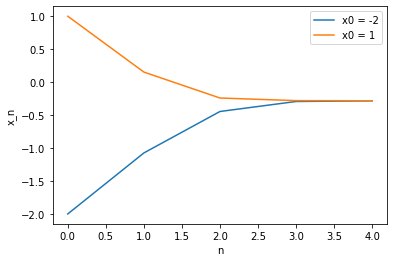

In [87]:
plt.plot(np.arange(0, iters, 1), x[0, :], label='x0 = -2')
plt.plot(np.arange(0, iters, 1), x[1, :], label='x0 = 1')
plt.ylabel('x_n')
plt.xlabel('n')
plt.legend()
plt.show()

In [90]:
print("The minimum of g(x) is {0} at x={1}".format(g(x[0,-1]), x[0,-1]))

The minimum of g(x) is 0.03265729378239994 at x=-0.2836231987205744


# 6.4d

In [176]:
X = np.loadtxt('noisyOr_X.txt')
y = np.loadtxt('noisyOr_Y.txt')
Z = np.zeros_like(X)
T = X.shape[0] # number of examples
n = X.shape[1] # number of inputs
p = np.asarray([1/n]*n)

In [177]:
def p_y1_x(t):
    '''
    Probability y is 1 given x based on equation for 6.4a
    '''
    
    return 1 - prod([(1 - p[i])**X[t,i] for i in range(n)])

In [178]:
def p_y0_x(t):
    '''
    Probability y is 0 given x based on equation for 6.4a
    '''
    
    return 1 - p_y1_x(t)

In [179]:
def p_y_x(yt, t):
    '''
    Probability y given x
    '''
    if yt == 1:
        return p_y1_x(t)
    else:
        return p_y0_x(t)

In [180]:
def mistakes(y, yPred):
    '''
    Returns the number of mistakes between actual y and predicted y
    '''
    return len(y) - sum(y==yPred)

In [181]:
def predictions():
    '''
    Make predictions based on the equation for 6.4a
    '''
    return [1 if p_y1_x(t) >= 0.5 else 0 for t in range(T)]

In [182]:
def log_likely():
    '''
    Gives the normalized log-likelihood as defined in 6.4b
    ''' 
    return sum(np.log([p_y_x(y[t], t) for t in range(T)]))/T
            

In [183]:
def update():
    '''
    Update p according to 6.4c
    '''
    Ti = np.zeros(n)
    p_new = np.zeros_like(p)
    for i in range(n):
        Ti[i] = sum(X[:,i])
        p_new[i] = (1 / Ti[i])*sum([((y[t]*X[t,i]*p[i])/p_y1_x(t)) for t in range(T)])
    
    
    return p_new

In [184]:
# EM Algo
n_iterations = 257
i_report = [0]
i_report.extend([2**(i) for i in range(9)])
print("Iterations\tN Mistakes\tLog-likelihood")
for i in range(n_iterations):
    if i in i_report:
        print(i, mistakes(y, predictions()), log_likely(), sep='\t\t')
        
    p = update()
    
    

Iterations	N Mistakes	Log-likelihood
0		195		-1.044559748133717
1		60		-0.504940510120726
2		43		-0.410763774177962
4		42		-0.3651271742872333
8		44		-0.34766321194257643
16		40		-0.33467666667097906
32		37		-0.32259268945106767
64		37		-0.31483106238579917
128		36		-0.3111558174240999
256		36		-0.3101611042419866
